In [1]:
import string
from operator import itemgetter

def tokenize_and_count_frequency(file_path):
    # Step 1: Read the Text File
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Step 2: Tokenization and Frequency Tracking
    words = text.split()
    wdict = {}

    for word in words:
        # Remove non-ASCII characters and convert to lowercase
        cleaned_word = ''.join(char for char in word if char.isascii()).lower()

        # Remove punctuation
        cleaned_word = cleaned_word.translate(str.maketrans('', '', string.punctuation))

        # Update word frequency in the dictionary
        if cleaned_word:
            if wdict.get(cleaned_word) is not None:
                wdict[cleaned_word] += 1
            else:
                wdict[cleaned_word] = 1

    # Step 3: Sorting the dictionary by word occurrence frequency
    sorted_wdict = dict(sorted(wdict.items(), key=itemgetter(1), reverse=True))

    # Step 4: Calculate the top 100 words and distinct words for the top 90%
    total_words = sum(sorted_wdict.values())
    cumulative_frequency = 0
    top_100_words = []
    distinct_words_top_90 = set()

    for word, frequency in sorted_wdict.items():
        cumulative_frequency += frequency
        distinct_words_top_90.add(word)

        if len(top_100_words) < 100:
            top_100_words.append((word, frequency))

        if cumulative_frequency / total_words >= 0.9:
            break

    return top_100_words, len(distinct_words_top_90)

# Specify the correct file path
file_path = 'Life_On_The_Mississippi.txt'

# Call the function with the file path
top_100_words, distinct_words_top_90 = tokenize_and_count_frequency(file_path)

# Print or use the results as needed
print("Top 100 Most Frequent Words:", top_100_words)
print("Number of Distinct Words in the Top 90%:", distinct_words_top_90)


Top 100 Most Frequent Words: [('the', 9255), ('and', 5892), ('of', 4532), ('a', 4053), ('to', 3592), ('in', 2593), ('it', 2293), ('i', 2205), ('was', 2093), ('that', 1724), ('he', 1402), ('is', 1148), ('for', 1095), ('with', 1081), ('you', 1033), ('his', 961), ('had', 961), ('but', 952), ('on', 947), ('as', 881), ('this', 781), ('they', 758), ('at', 750), ('not', 722), ('all', 720), ('by', 713), ('one', 686), ('there', 627), ('were', 625), ('be', 617), ('my', 582), ('or', 581), ('from', 577), ('have', 571), ('out', 541), ('so', 536), ('up', 529), ('him', 523), ('we', 519), ('me', 516), ('when', 505), ('would', 478), ('which', 476), ('river', 457), ('an', 440), ('them', 425), ('no', 422), ('then', 405), ('said', 399), ('are', 387), ('if', 381), ('their', 378), ('now', 369), ('about', 346), ('time', 337), ('been', 335), ('down', 328), ('its', 323), ('could', 313), ('has', 305), ('will', 301), ('into', 300), ('what', 285), ('her', 278), ('two', 273), ('do', 271), ('other', 270), ('some', 

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.000s...
[t-SNE] Computed neighbors for 20 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 0.238588
[t-SNE] Computed conditional probabilities in 0.000s
[t-SNE] Iteration 50: error = 60.2318153, gradient norm = 0.7389885 (50 iterations in 0.015s)
[t-SNE] Iteration 100: error = 59.6403275, gradient norm = 0.5886708 (50 iterations in 0.016s)
[t-SNE] Iteration 150: error = 61.6817703, gradient norm = 0.9027302 (50 iterations in 0.016s)
[t-SNE] Iteration 200: error = 62.8783264, gradient norm = 0.4738705 (50 iterations in 0.000s)
[t-SNE] Iteration 250: error = 58.1649208, gradient norm = 0.6021281 (50 iterations in 0.016s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.164921
[t-SNE] Iteration 300: error = 1.1075063, gradient norm = 0.0228514 (50 iterations in 0.016s)
[t-SNE] Iteration 350: error = 0.7352242, gradient norm = 0.0107847 (50 i

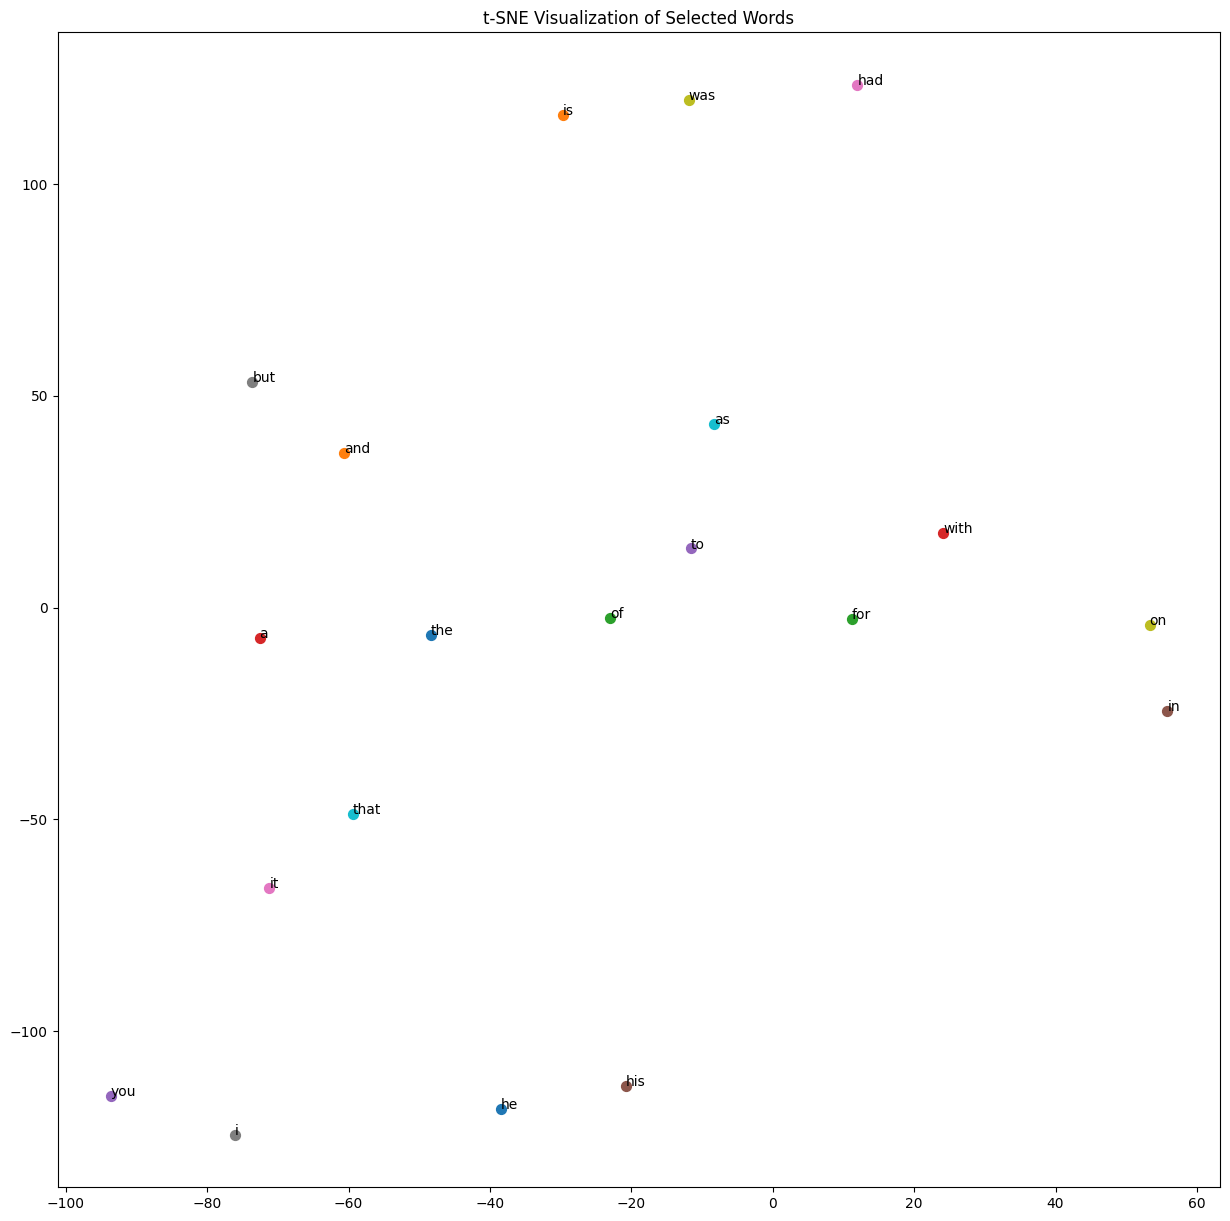

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel
import string
from operator import itemgetter

# Function to tokenize and count frequency
def tokenize_and_count_frequency(file_path):
    # Step 1: Read the Text File
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Step 2: Tokenization and Frequency Tracking
    words = text.split()
    wdict = {}

    for word in words:
        # Remove non-ASCII characters and convert to lowercase
        cleaned_word = ''.join(char for char in word if char.isascii()).lower()

        # Remove punctuation
        cleaned_word = cleaned_word.translate(str.maketrans('', '', string.punctuation))

        # Update word frequency in the dictionary
        if cleaned_word:
            if wdict.get(cleaned_word) is not None:
                wdict[cleaned_word] += 1
            else:
                wdict[cleaned_word] = 1

    # Step 3: Sorting the dictionary by word occurrence frequency
    sorted_wdict = dict(sorted(wdict.items(), key=itemgetter(1), reverse=True))

    # Step 4: Calculate the top 100 words and distinct words for the top 90%
    total_words = sum(sorted_wdict.values())
    cumulative_frequency = 0
    top_100_words = []
    distinct_words_top_90 = set()

    for word, frequency in sorted_wdict.items():
        cumulative_frequency += frequency
        distinct_words_top_90.add(word)

        if len(top_100_words) < 100:
            top_100_words.append((word, frequency))

        if cumulative_frequency / total_words >= 0.9:
            break

    return top_100_words, len(distinct_words_top_90)

# Specify the correct file path
file_path = 'Life_On_The_Mississippi.txt'

# Call the function with the file path
top_100_words, distinct_words_top_90 = tokenize_and_count_frequency(file_path)

# Extract a subset of words for visualization
words_to_visualize = [word[0] for word in top_100_words[:20]]  # Adjust the number as needed

# Load BERT
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
model.eval()
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Get BERT's vocabulary embeddings
word_embs = model.get_input_embeddings()
indices_to_visualize = [tokenizer.convert_tokens_to_ids(word) for word in words_to_visualize]
word_embs_to_visualize = word_embs(torch.LongTensor(indices_to_visualize)).detach().numpy()

# Run t-SNE on the selected words' embeddings
my_tsne_words = TSNE(n_components=2, early_exaggeration=12, verbose=2, metric='cosine', init='pca', n_iter=2500, perplexity=5)
word_embs_to_visualize_tsne = my_tsne_words.fit_transform(word_embs_to_visualize)

# Plot the transformed BERT vocabulary embeddings
plt.figure(figsize=(15, 15))
for i, txt in enumerate(words_to_visualize):
    plt.scatter(word_embs_to_visualize_tsne[i, 0], word_embs_to_visualize_tsne[i, 1], s=50)
    plt.text(word_embs_to_visualize_tsne[i, 0], word_embs_to_visualize_tsne[i, 1], txt, fontsize=10)

plt.title("t-SNE Visualization of Selected Words")
plt.show()
